In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# sns.set(style="dark")

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('D:\\kaggleDatasets\\nfl-playing-surface-analytics'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


D:\kaggleDatasets\nfl-playing-surface-analytics\InjuryRecord.csv
D:\kaggleDatasets\nfl-playing-surface-analytics\PlayerTrackData.csv
D:\kaggleDatasets\nfl-playing-surface-analytics\PlayList.csv


In [2]:
PlayList = pd.read_csv('D:\\kaggleDatasets\\nfl-playing-surface-analytics\\PlayList.csv')
#PlayerTrackData = pd.read_csv('D:\\kaggleDatasets\\nfl-playing-surface-analytics\\PlayerTrackData.csv')
InjuryRecord = pd.read_csv('D:\\kaggleDatasets\\nfl-playing-surface-analytics\\InjuryRecord.csv')

In [3]:
PlayList.head()

,PlayerKey,GameID,PlayKey,RosterPosition,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup
0,26624,26624-1,26624-1-1,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,1,QB,QB
1,26624,26624-1,26624-1-2,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,2,QB,QB
2,26624,26624-1,26624-1-3,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Rush,3,QB,QB
3,26624,26624-1,26624-1-4,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Rush,4,QB,QB
4,26624,26624-1,26624-1-5,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,5,QB,QB


In [4]:
PlayList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267005 entries, 0 to 267004
Data columns (total 14 columns):
PlayerKey         267005 non-null int64
GameID            267005 non-null object
PlayKey           267005 non-null object
RosterPosition    267005 non-null object
PlayerDay         267005 non-null int64
PlayerGame        267005 non-null int64
StadiumType       250095 non-null object
FieldType         267005 non-null object
Temperature       267005 non-null int64
Weather           248314 non-null object
PlayType          266638 non-null object
PlayerGamePlay    267005 non-null int64
Position          267005 non-null object
PositionGroup     267005 non-null object
dtypes: int64(5), object(9)
memory usage: 28.5+ MB


In [5]:
PlayList.isna().sum()

PlayerKey             0
GameID                0
PlayKey               0
RosterPosition        0
PlayerDay             0
PlayerGame            0
StadiumType       16910
FieldType             0
Temperature           0
Weather           18691
PlayType            367
PlayerGamePlay        0
Position              0
PositionGroup         0
dtype: int64

In [6]:
PlayList.describe(include='all')

,PlayerKey,GameID,PlayKey,RosterPosition,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup
count,267005.000000,267005,267005,267005,267005.000000,267005.000000,250095,267005,267005.000000,248314,266638,267005.000000,267005,267005
unique,NaN,5712,267005,10,NaN,NaN,29,2,NaN,63,11,NaN,23,10
top,NaN,42413-21,44860-12-54,Linebacker,NaN,NaN,Outdoor,Natural,NaN,Cloudy,Pass,NaN,WR,DB
freq,NaN,102,1,50129,NaN,NaN,145032,156902,NaN,60705,138079,NaN,43457,68295
mean,41515.381465,NaN,NaN,NaN,210.451351,13.799131,NaN,NaN,-35.029535,NaN,NaN,29.058647,NaN,NaN
std,4125.858924,NaN,NaN,NaN,183.643654,8.342894,NaN,NaN,304.583110,NaN,NaN,19.626551,NaN,NaN
min,26624.000000,NaN,NaN,NaN,-62.000000,1.000000,NaN,NaN,-999.000000,NaN,NaN,1.000000,NaN,NaN
25%,39653.000000,NaN,NaN,NaN,43.000000,7.000000,NaN,NaN,44.000000,NaN,NaN,13.000000,NaN,NaN
50%,42432.000000,NaN,NaN,NaN,102.000000,13.000000,NaN,NaN,61.000000,NaN,NaN,26.000000,NaN,NaN
75%,44480.000000,NaN,NaN,NaN,400.000000,20.000000,NaN,NaN,72.000000,NaN,NaN,43.000000,NaN,NaN


In [7]:
PlayList.RosterPosition.value_counts()

Linebacker           50129
Offensive Lineman    47413
Wide Receiver        43391
Safety               39387
Defensive Lineman    30588
Cornerback           28987
Running Back         11664
Tight End             7752
Quarterback           6986
Kicker                 708
Name: RosterPosition, dtype: int64

In [8]:
def bar_lables(var, tit, df, size=1):
    f, ax = plt.subplots(1, 1, figsize=(4*size, 5))
    total = float(len(df))
    g = sns.countplot(df[var], order=df[var].value_counts().index, palette='Blues', edgecolor='Navy')
    g.set_title(f"Count per {tit}", fontsize=20)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right', fontsize=10)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total), ha='center', fontsize=10)

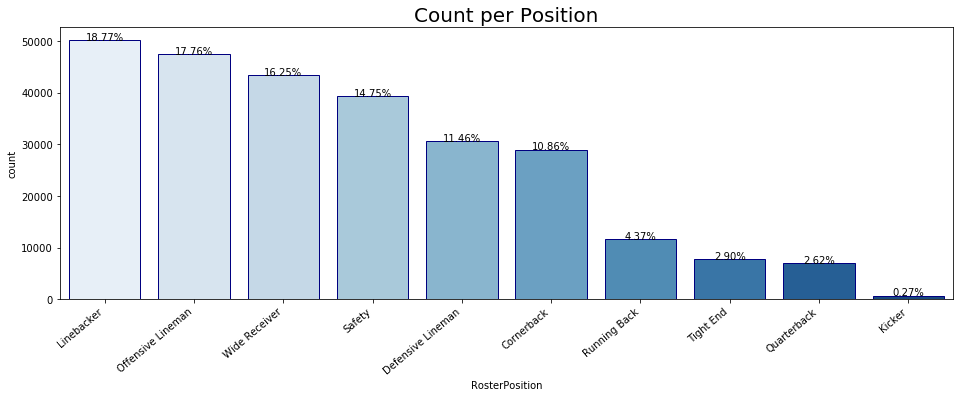

In [9]:
bar_lables('RosterPosition', 'Position', PlayList, size=4)

In [10]:
PlayList.StadiumType.value_counts()

Outdoor                   145032
Outdoors                   32956
Indoors                    22805
Dome                        9376
Retractable Roof            8914
Indoor                      6892
Open                        4124
Domed, closed               3076
Retr. Roof - Closed         2235
Retr. Roof-Closed           2015
Domed, open                 1779
Dome, closed                1059
Closed Dome                 1011
Domed                        985
Oudoor                       914
Domed, Open                  807
Ourdoor                      778
Outdoor Retr Roof-Open       601
Outddors                     595
Indoor, Roof Closed          547
Retr. Roof-Open              486
Retr. Roof - Open            486
Indoor, Open Roof            479
Bowl                         465
Retr. Roof Closed            414
Heinz Field                  389
Outdor                       356
Outside                      341
Cloudy                       178
Name: StadiumType, dtype: int64

In [11]:
 List_Sta_typ = PlayList["StadiumType"].astype(str).str.strip().str.lower().unique()
# print(List_Sta_typ)

List_initials = []

for i in range(len(List_Sta_typ)):
    List_initials.append(List_Sta_typ[i][0:3])

In [12]:
List_initials = set(List_initials)

for j in List_initials:
    print(f"Initial: {j}")
    print(PlayList[PlayList["StadiumType"].fillna("").str.lower().str.startswith(j)].StadiumType.unique())
    print()

Initial: nan
[]

Initial: oud
['Oudoor']

Initial: out
['Outdoor' 'Outdoors' 'Outdoor Retr Roof-Open' 'Outddors' 'Outdor'
 'Outside']

Initial: bow
['Bowl']

Initial: our
['Ourdoor']

Initial: ope
['Open']

Initial: ret
['Retr. Roof-Closed' 'Retractable Roof' 'Retr. Roof - Closed'
 'Retr. Roof-Open' 'Retr. Roof - Open' 'Retr. Roof Closed']

Initial: clo
['Closed Dome' 'Cloudy']

Initial: ind
['Indoors' 'Indoor' 'Indoor, Roof Closed' 'Indoor, Open Roof']

Initial: hei
['Heinz Field']

Initial: dom
['Domed, closed' 'Dome' 'Domed' 'Dome, closed' 'Domed, Open' 'Domed, open']



In [13]:
outdoor = ['Outdoor', 'Outdoors', 'Cloudy', 'Heinz Field', 
              'Outdor', 'Ourdoor', 'Outside', 'Outddors', 
              'Outdoor Retr Roof-Open', 'Oudoor', 'Bowl']

indoor_closed = ['Indoors', 'Indoor', 'Indoor, Roof Closed', 'Indoor, Roof Closed',
                   'Retractable Roof', 'Retr. Roof-Closed', 'Retr. Roof - Closed', 'Retr. Roof Closed']

indoor_open = ['Indoor, Open Roof', 'Open', 'Retr. Roof-Open', 'Retr. Roof - Open']

dome_closed = ['Dome', 'Domed, closed', 'Closed Dome', 'Domed', 'Dome, closed']

dome_open = ['Domed, Open', 'Domed, open']

List_Types_Stat = [outdoor, indoor_closed, indoor_open, dome_closed, dome_open]

In [14]:
conditions_stadium = [PlayList['StadiumType'].isin(outdoor),
                      PlayList['StadiumType'].isin(indoor_closed),
                      PlayList['StadiumType'].isin(indoor_open),
                      PlayList['StadiumType'].isin(dome_closed),
                      PlayList['StadiumType'].isin(dome_open)]

List_Types_Stat_name = ["outdoor", "indoor_closed", "indoor_opened", "dome_closed", "dome_opened"]

PlayList['StadiumType_cl'] = np.select(conditions_stadium, List_Types_Stat_name, default='others')

In [15]:
PlayList['StadiumType_cl'].unique() # Cleaned data for Stadium Type

array(['outdoor', 'indoor_closed', 'indoor_opened', 'dome_closed',
       'others', 'dome_opened'], dtype=object)

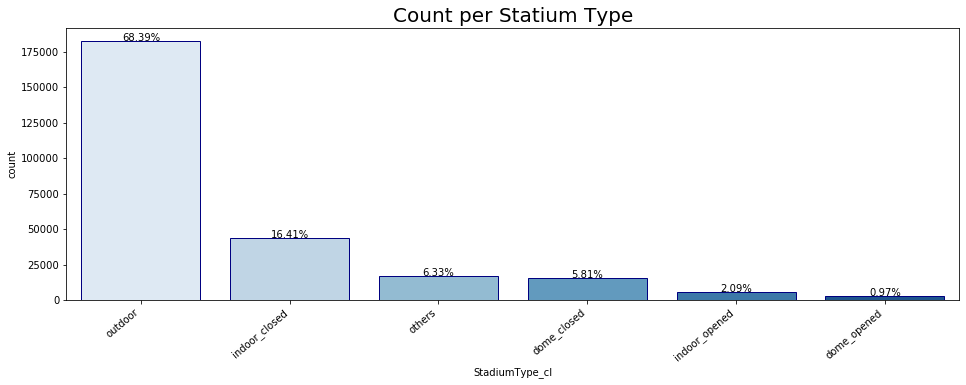

In [16]:
# plt.figure(figsize=(10,6))
# ax = sns.countplot(x='StadiumType_cl', order=PlayList.StadiumType_cl.value_counts().index, data=PlayList)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
# plt.title("Qty per Stadium Type")
# plt.tight_layout()

bar_lables('StadiumType_cl', 'Statium Type', PlayList, size=4)

In [17]:
PlayList['FieldType'].value_counts(normalize=True) * 100

Natural      58.763694
Synthetic    41.236306
Name: FieldType, dtype: float64

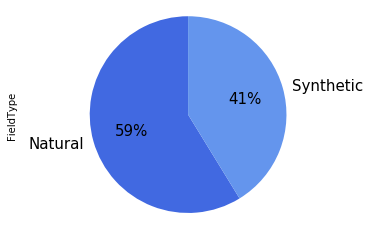

In [18]:
# # sns.countplot(x='FieldType', data = PlayList)
# # plt.title("Qty per FieldType")

# bar_lables('FieldType', 'Field Type', PlayList)

colors = ['royalblue', 'cornflowerblue']

PlayList.FieldType.str.get_dummies().sum().plot.pie(label='FieldType', 
                                                    autopct='%1.0f%%', 
                                                    colors=colors, startangle=90, fontsize=15)
plt.axis('equal');

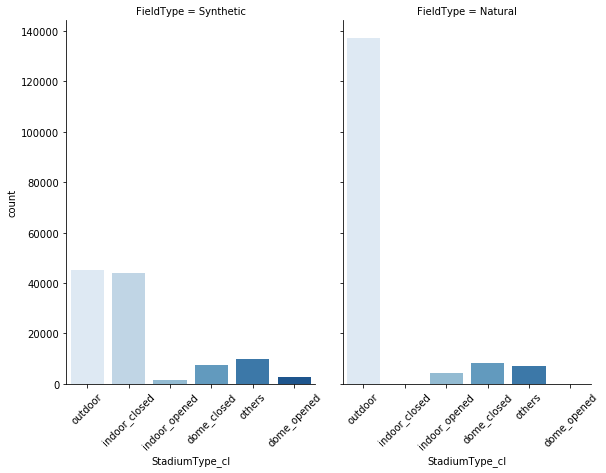

In [19]:
# plt.figure(figsize=(10,8))
# sns.countplot(x='FieldType', hue='StadiumType_cl', data = PlayList)

g = sns.catplot(x='StadiumType_cl', col='FieldType', data=PlayList, kind='count',
                height=6, palette='Blues', aspect=.7)
g.set_xticklabels(rotation=45)

In [20]:
InjuryRecord.head()

,PlayerKey,GameID,PlayKey,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42
0,39873,39873-4,39873-4-32,Knee,Synthetic,1,1,1,1
1,46074,46074-7,46074-7-26,Knee,Natural,1,1,0,0
2,36557,36557-1,36557-1-70,Ankle,Synthetic,1,1,1,1
3,46646,46646-3,46646-3-30,Ankle,Natural,1,0,0,0
4,43532,43532-5,43532-5-69,Ankle,Synthetic,1,1,1,1


In [21]:
InjuryRecord['BodyPart'].value_counts()

Knee     48
Ankle    42
Foot      7
Toes      7
Heel      1
Name: BodyPart, dtype: int64

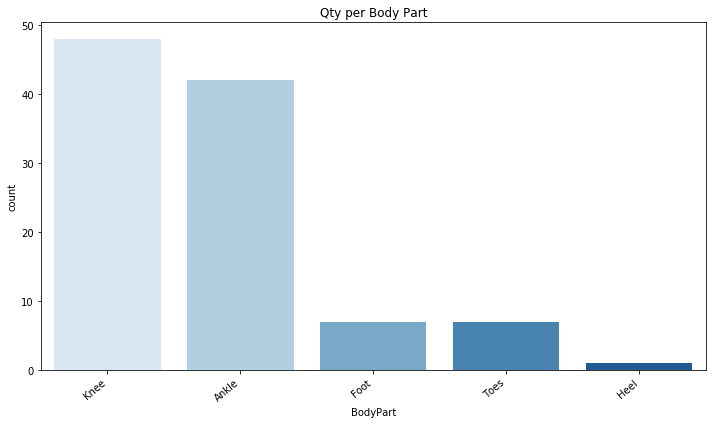

In [22]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='BodyPart', order=InjuryRecord.BodyPart.value_counts().index, data=InjuryRecord, palette='Blues')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.title("Qty per Body Part")
plt.tight_layout()

In [23]:
InjuryRecord

,PlayerKey,GameID,PlayKey,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42
0,39873,39873-4,39873-4-32,Knee,Synthetic,1,1,1,1
1,46074,46074-7,46074-7-26,Knee,Natural,1,1,0,0
2,36557,36557-1,36557-1-70,Ankle,Synthetic,1,1,1,1
3,46646,46646-3,46646-3-30,Ankle,Natural,1,0,0,0
4,43532,43532-5,43532-5-69,Ankle,Synthetic,1,1,1,1
...,...,...,...,...,...,...,...,...,...
100,44423,44423-13,NaN,Knee,Synthetic,1,0,0,0
101,31933,31933-20,NaN,Knee,Synthetic,1,0,0,0
102,47285,47285-4,NaN,Knee,Natural,1,1,0,0
103,37068,37068-19,NaN,Knee,Natural,1,1,0,0


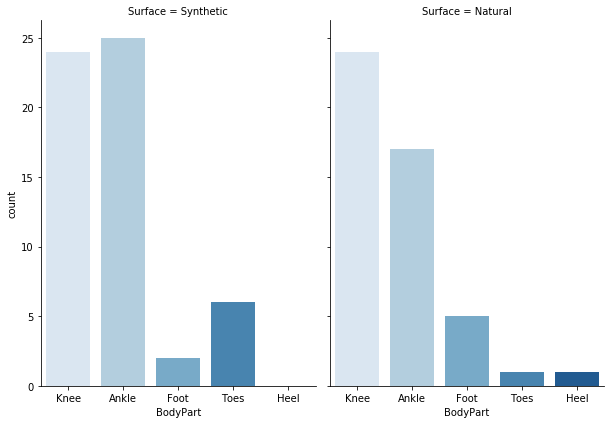

In [24]:
sns.catplot(x='BodyPart', col='Surface', data=InjuryRecord, kind='count',
                height=6, palette='Blues', aspect=.7)

In [25]:
# InjuryRecord.loc.groupby('BodyPart').sum()
InjuryRecord[['BodyPart','DM_M1','DM_M7','DM_M28','DM_M42']].groupby('BodyPart').sum()

,DM_M1,DM_M7,DM_M28,DM_M42
BodyPart,,,,
Ankle,42,26,13,11
Foot,7,7,7,5
Heel,1,1,0,0
Knee,48,37,16,13
Toes,7,5,1,0


In [26]:
Inj_Surf_BodyPart = InjuryRecord.groupby(['Surface','BodyPart'])['DM_M1','DM_M7','DM_M28','DM_M42'].sum().reset_index()
Inj_Surf_BodyPart

,Surface,BodyPart,DM_M1,DM_M7,DM_M28,DM_M42
0,Natural,Ankle,17,9,3,3
1,Natural,Foot,5,5,5,4
2,Natural,Heel,1,1,0,0
3,Natural,Knee,24,19,7,6
4,Natural,Toes,1,1,0,0
5,Synthetic,Ankle,25,17,10,8
6,Synthetic,Foot,2,2,2,1
7,Synthetic,Knee,24,18,9,7
8,Synthetic,Toes,6,4,1,0


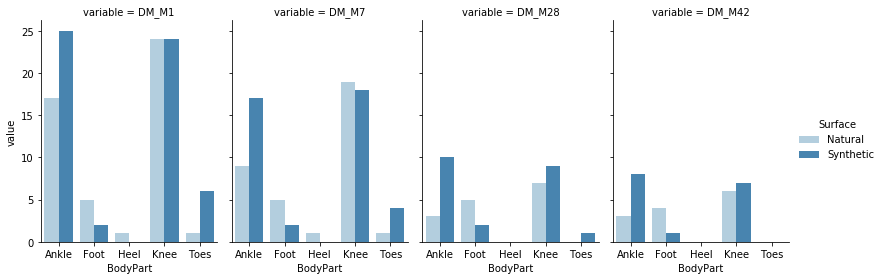

In [27]:
Inj_Surf_BodyPart_New = pd.melt(Inj_Surf_BodyPart, id_vars=['Surface','BodyPart'], value_vars=['DM_M1','DM_M7','DM_M28','DM_M42'])

sns.catplot(x='BodyPart', y='value', hue='Surface', col='variable',
            data=Inj_Surf_BodyPart_New, kind='bar', height=4, aspect=.7, palette='Blues')

In [28]:
Relations_table = pd.merge(PlayList, InjuryRecord, how='left', on='PlayerKey')

In [29]:
col = ['PlayerKey', 'RosterPosition', 'PlayerDay', 'FieldType', 'Temperature', 'PlayType', 'Position', 'PositionGroup',
       'StadiumType_cl', 'BodyPart', 'Surface', 'DM_M1', 'DM_M7', 'DM_M28', 'DM_M42']

Relations_table = Relations_table[col].copy()

In [30]:
Relations_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273337 entries, 0 to 273336
Data columns (total 15 columns):
PlayerKey         273337 non-null int64
RosterPosition    273337 non-null object
PlayerDay         273337 non-null int64
FieldType         273337 non-null object
Temperature       273337 non-null int64
PlayType          272959 non-null object
Position          273337 non-null object
PositionGroup     273337 non-null object
StadiumType_cl    273337 non-null object
BodyPart          96081 non-null object
Surface           96081 non-null object
DM_M1             96081 non-null float64
DM_M7             96081 non-null float64
DM_M28            96081 non-null float64
DM_M42            96081 non-null float64
dtypes: float64(4), int64(3), object(8)
memory usage: 33.4+ MB


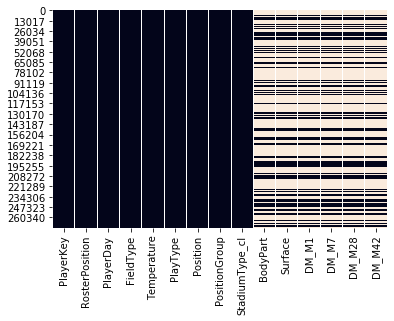

In [31]:
sns.heatmap(Relations_table.isnull(), cbar=False)

In [32]:
Relations_table.dropna(inplace=True)

In [33]:
Relations_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95963 entries, 7162 to 272708
Data columns (total 15 columns):
PlayerKey         95963 non-null int64
RosterPosition    95963 non-null object
PlayerDay         95963 non-null int64
FieldType         95963 non-null object
Temperature       95963 non-null int64
PlayType          95963 non-null object
Position          95963 non-null object
PositionGroup     95963 non-null object
StadiumType_cl    95963 non-null object
BodyPart          95963 non-null object
Surface           95963 non-null object
DM_M1             95963 non-null float64
DM_M7             95963 non-null float64
DM_M28            95963 non-null float64
DM_M42            95963 non-null float64
dtypes: float64(4), int64(3), object(8)
memory usage: 11.7+ MB


In [34]:
Relations_table

,PlayerKey,RosterPosition,PlayerDay,FieldType,Temperature,PlayType,Position,PositionGroup,StadiumType_cl,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42
7162,31070,Running Back,1,Natural,67,Punt,RB,RB,outdoor,Knee,Natural,1.0,1.0,1.0,1.0
7163,31070,Running Back,1,Natural,67,Pass,RB,RB,outdoor,Knee,Natural,1.0,1.0,1.0,1.0
7164,31070,Running Back,1,Natural,67,Pass,RB,RB,outdoor,Knee,Natural,1.0,1.0,1.0,1.0
7165,31070,Running Back,1,Natural,67,Pass,RB,RB,outdoor,Knee,Natural,1.0,1.0,1.0,1.0
7166,31070,Running Back,1,Natural,67,Pass,RB,RB,outdoor,Knee,Natural,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272704,47813,Cornerback,113,Synthetic,46,Pass,CB,DB,indoor_closed,Ankle,Synthetic,1.0,1.0,0.0,0.0
272705,47813,Cornerback,113,Synthetic,46,Pass,CB,DB,indoor_closed,Ankle,Synthetic,1.0,1.0,0.0,0.0
272706,47813,Cornerback,113,Synthetic,46,Rush,CB,DB,indoor_closed,Ankle,Synthetic,1.0,1.0,0.0,0.0
272707,47813,Cornerback,113,Synthetic,46,Rush,CB,DB,indoor_closed,Ankle,Synthetic,1.0,1.0,0.0,0.0


Text(0.5, 1.0, 'Compare PlayType per Surface')

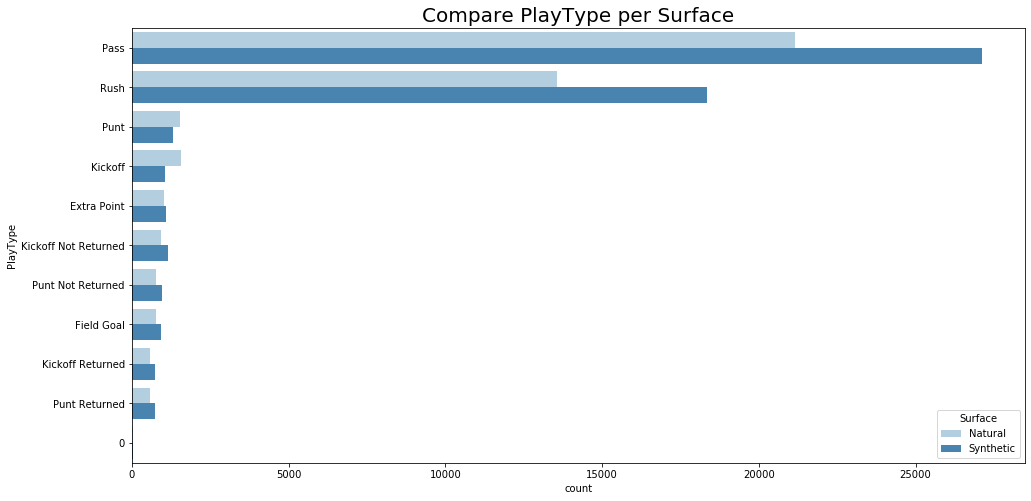

In [35]:
plt.figure(figsize=(16,8))
g = sns.countplot(y="PlayType", hue="Surface", 
                  order=Relations_table['PlayType'].value_counts().index, 
                  data=Relations_table, palette='Blues')
plt.title("Compare PlayType per Surface", fontsize=20)

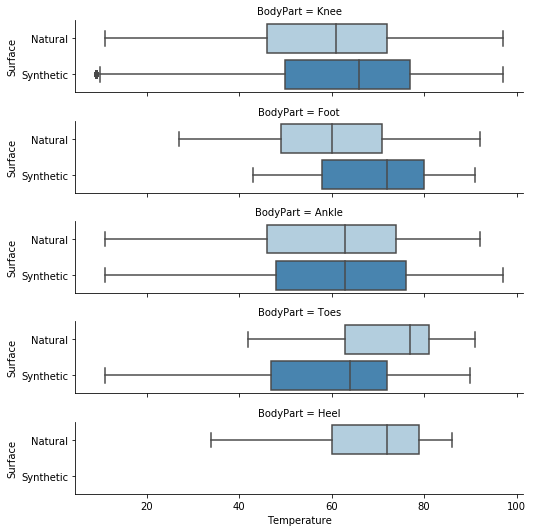

In [36]:
sns.catplot(x="Temperature", y="Surface", row="BodyPart",
                kind="box", orient="h", height=1.5, aspect=5,
                data=Relations_table.query("Temperature > 0"), palette='Blues');

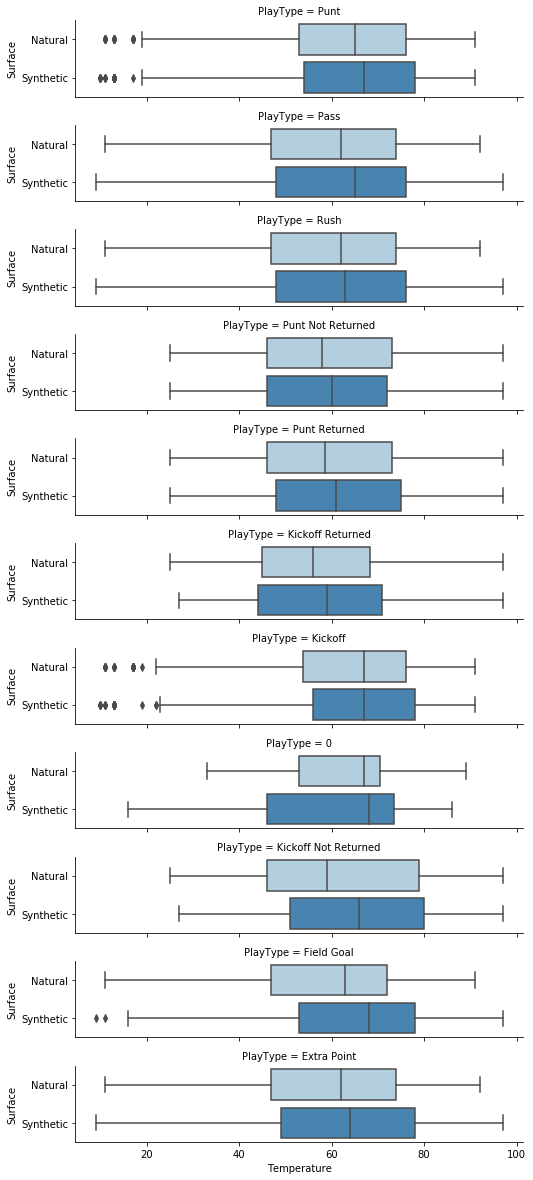

In [37]:
sns.catplot(x="Temperature", y="Surface", row="PlayType",
                kind="box", orient="h", height=1.5, aspect=5,
                data=Relations_table.query("Temperature > 0"), palette='Blues');

Text(0.5, 1.0, 'Injuries: Position per Surface')

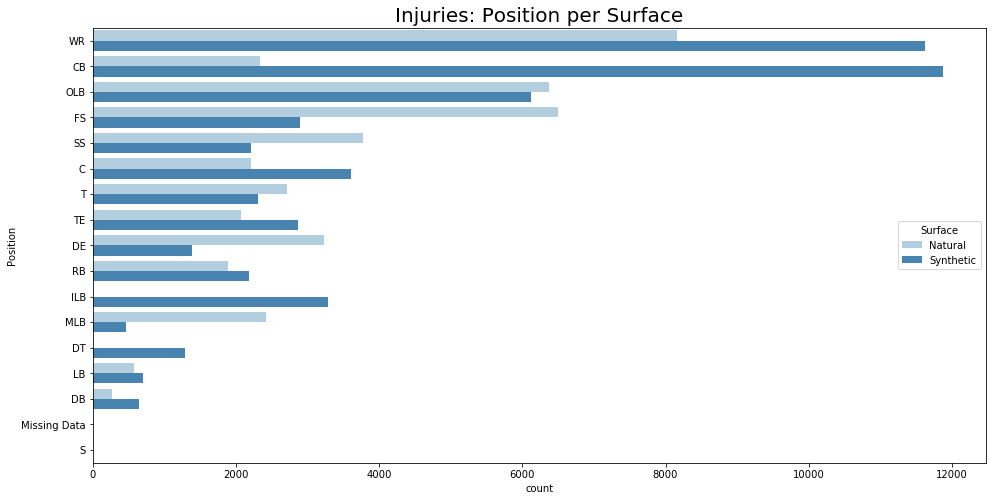

In [38]:
plt.figure(figsize=(16,8))
g = sns.countplot(y="Position", hue="Surface", 
                  order=Relations_table['Position'].value_counts().index, 
                  data=Relations_table, palette='Blues')
plt.title("Injuries: Position per Surface", fontsize=20)